In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from firewall import *

pd.set_option('display.max_columns', 100)

# Load Data

In [2]:
df = pd.read_csv("./log2.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [4]:
df.isna().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [5]:
port_columns = [c for c in df.columns if "Port" in c]
for col in port_columns:
    print(f"{col} --> Number of Unique Values = {df[col].nunique()}")

Source Port --> Number of Unique Values = 22724
Destination Port --> Number of Unique Values = 3273
NAT Source Port --> Number of Unique Values = 29152
NAT Destination Port --> Number of Unique Values = 2533


In [6]:
df['Action'].value_counts(normalize=True)

allow         0.574376
deny          0.228697
drop          0.196103
reset-both    0.000824
Name: Action, dtype: float64

# Create cross validation and final test sets

In [7]:
# train_df, test_df = create_train_and_final_test_sets(df=df)
train_df = pd.read_csv("./datasets/train_20221018_1118.csv")

In [8]:
train_df.shape

(58978, 12)

In [9]:
port_columns = [c for c in train_df.columns if "Port" in c]
for col in port_columns:
    print(f"{col} --> Number of Unique Values = {train_df[col].nunique()}")

Source Port --> Number of Unique Values = 21768
Destination Port --> Number of Unique Values = 3098
NAT Source Port --> Number of Unique Values = 26848
NAT Destination Port --> Number of Unique Values = 2393


# Baseline Models

In [10]:
train_df['Action'].value_counts(normalize=True)

allow         0.574367
deny          0.228695
drop          0.196107
reset-both    0.000831
Name: Action, dtype: float64

In [11]:
#### STANDARD SCALER! 

all_estimators = [SVC(kernel='rbf', 
                      random_state=7742), 
                  SVC(kernel='poly', 
                      random_state=7742),
                  SVC(kernel='sigmoid', 
                      random_state=7742),
                  SVC(kernel='linear', 
                      random_state=7742),
                  LinearSVC(random_state=7742),
                  LinearSVC(max_iter=20_000, 
                            random_state=7742),
                  SGDClassifier(random_state=7742),
                  SGDClassifier(max_iter=20_000, 
                                random_state=7742)]


metrics=['f1_weighted', 'f1_micro', 'f1_macro',
         'recall_weighted', 'recall_micro', 'recall_macro',
         'precision_weighted', 'precision_micro', 'precision_macro',
         'accuracy', 'balanced_accuracy']

# base_df = get_all_baseline_model_performance(df=train_df, 
#                                              target_column="Action", 
#                                              estimators=all_estimators, 
#                                              metrics=metrics,
#                                              n_cv_splits=5, 
#                                              random_state=7742, 
#                                              shuffle=True, 
#                                              n_jobs=50, 
#                                              return_estimator=False, 
#                                              sort_metric="test_f1_weighted", 
#                                              smaller_is_better=False, 
#                                              candidate_ohe_columns=['Source Port', 'Destination Port', 
#                                                                     'NAT Source Port', 'NAT Destination Port'])

base_df = pd.read_csv("./models/baseline_models_ohe_10192022.csv")
# base_df.to_csv("./models/baseline_models_ohe_10192022.csv",index=False)
base_df.head()

,model,columns_encoded,test_f1_weighted_mean,test_f1_weighted_min,test_f1_weighted_max,test_f1_weighted_std,train_f1_weighted_mean,train_f1_weighted_min,train_f1_weighted_max,train_f1_weighted_std,test_f1_micro_mean,test_f1_micro_min,test_f1_micro_max,test_f1_micro_std,train_f1_micro_mean,train_f1_micro_min,train_f1_micro_max,train_f1_micro_std,test_f1_macro_mean,test_f1_macro_min,test_f1_macro_max,test_f1_macro_std,train_f1_macro_mean,train_f1_macro_min,train_f1_macro_max,train_f1_macro_std,test_recall_weighted_mean,test_recall_weighted_min,test_recall_weighted_max,test_recall_weighted_std,train_recall_weighted_mean,train_recall_weighted_min,train_recall_weighted_max,train_recall_weighted_std,test_recall_micro_mean,test_recall_micro_min,test_recall_micro_max,test_recall_micro_std,train_recall_micro_mean,train_recall_micro_min,train_recall_micro_max,train_recall_micro_std,test_recall_macro_mean,test_recall_macro_min,test_recall_macro_max,test_recall_macro_std,train_recall_macro_mean,train_recall_macro_min,train_recall_macro_max,train_recall_macro_std,test_precision_weighted_mean,test_precision_weighted_min,test_precision_weighted_max,test_precision_weighted_std,train_precision_weighted_mean,train_precision_weighted_min,train_precision_weighted_max,train_precision_weighted_std,test_precision_micro_mean,test_precision_micro_min,test_precision_micro_max,test_precision_micro_std,train_precision_micro_mean,train_precision_micro_min,train_precision_micro_max,train_precision_micro_std,test_precision_macro_mean,test_precision_macro_min,test_precision_macro_max,test_precision_macro_std,train_precision_macro_mean,train_precision_macro_min,train_precision_macro_max,train_precision_macro_std,test_accuracy_mean,test_accuracy_min,test_accuracy_max,test_accuracy_std,train_accuracy_mean,train_accuracy_min,train_accuracy_max,train_accuracy_std,test_balanced_accuracy_mean,test_balanced_accuracy_min,test_balanced_accuracy_max,test_balanced_accuracy_std,train_balanced_accuracy_mean,train_balanced_accuracy_min,train_balanced_accuracy_max,train_balanced_accuracy_std,fit_time_mean,fit_time_min,fit_time_max,fit_time_std,score_time_mean,score_time_min,score_time_max,score_time_std
0,"SVC(kernel='linear', random_state=7742)","Source Port, Destination Port, NAT Source Port",0.996877,0.996503,0.997261,0.000252,0.998613,0.998515,0.998706,0.000064,0.996948,0.996609,0.997372,0.000257,0.998614,0.998516,0.998707,0.000064,0.917364,0.890109,0.969532,0.030743,0.998862,0.998775,0.998939,0.000053,0.996948,0.996609,0.997372,0.000257,0.998614,0.998516,0.998707,0.000064,0.996948,0.996609,0.997372,0.000257,0.998614,0.998516,0.998707,0.000064,0.879764,0.847652,0.947903,0.038566,0.998800,0.998374,0.999280,0.000394,0.996956,0.996621,0.997375,0.000255,0.998618,0.998519,0.998709,0.000063,0.996948,0.996609,0.997372,0.000257,0.998614,0.998516,0.998707,0.000064,0.997483,0.996503,0.998292,0.000733,0.998928,0.998424,0.999296,0.000386,0.996948,0.996609,0.997372,0.000257,0.998614,0.998516,0.998707,0.000064,0.879764,0.847652,0.947903,0.038566,0.998800,0.998374,0.999280,0.000394,29.592915,26.055254,33.352509,2.718526,2.758888,2.690408,2.827435,0.046220
1,"SVC(kernel='linear', random_state=7742)","Source Port, Destination Port, NAT Source Port...",0.996860,0.996503,0.997261,0.000264,0.998613,0.998515,0.998706,0.000064,0.996931,0.996609,0.997372,0.000270,0.998614,0.998516,0.998707,0.000064,0.917352,0.890109,0.969532,0.030736,0.998862,0.998775,0.998939,0.000053,0.996931,0.996609,0.997372,0.000270,0.998614,0.998516,0.998707,0.000064,0.996931,0.996609,0.997372,0.000270,0.998614,0.998516,0.998707,0.000064,0.879757,0.847652,0.947903,0.038563,0.998800,0.998374,0.999280,0.000394,0.996938,0.996621,0.997375,0.000269,0.998618,0.998519,0.998709,0.000063,0.996931,0.996609,0.997372,0.000270,0.998614,0.998516,0.998707,0.000064,0.997464,0.996503,0.998292,0.000726,0.998928,0.998424,0.999296,0.000386,0.996931,0.996609,0.997372,0.000270,0.998614,0.998516,0.998707,0.000064,0.879757,0.847652,0.947903,0.

## Best Baseline Model Error Analysis

# Hyperparameter Search

In [12]:
target = "Action"
drop_cols = ["NAT Destination Port"]

X = train_df.drop(columns=drop_cols+[target])
y = train_df[target].to_numpy()

ohe_cols = ["Source Port", "Destination Port", "NAT Source Port"]
scale_cols = [c for c in X.columns if c not in ohe_cols]

preprocess = ColumnTransformer(transformers=[("ohe", OneHotEncoder(handle_unknown='infrequent_if_exist'), ohe_cols), 
                                             ("scale", StandardScaler(), scale_cols)], 
                               remainder="passthrough",  
                               n_jobs=10)

model = Pipeline(steps=[("preprocess", preprocess), 
                        ("model", SVC(kernel='linear', 
                                      random_state=7742, 
                                      tol=5e-4, 
                                      cache_size=10_000, 
                                      break_ties=True))])


parameter_grid = {"model__C": np.logspace(-2, 2, 400), 
                  "model__class_weight": ["balanced", None]}

metrics=['f1_weighted', 'f1_micro', 'f1_macro',
         'recall_weighted', 'recall_micro', 'recall_macro',
         'precision_weighted', 'precision_micro', 'precision_macro',
         'accuracy', 'balanced_accuracy']

# gs1 = run_gridsearch(X=X, 
#                      y=y, 
#                      folds=5,
#                      estimator=model, 
#                      param_grid=parameter_grid, 
#                      n_jobs=50,
#                      scoring= metrics, 
#                      random_state=7742,
#                      save_name=get_gs_save_name(model_name=f"SVC_Linear"))

PATH=f"./models/SVC_Linear_20221019_0951.pkl"
gs1 = load_gs_from_pickle(pickle_filepath=PATH)
gs1_df = gs_to_clean_df(gs1.cv_results_, sort_metric="mean_test_f1_weighted")
gs1_df.loc[:,[c for c in gs1_df.columns if "std" not in c]].head()

,C,class_weight,params,mean_test_f1_weighted,rank_test_f1_weighted,mean_train_f1_weighted,mean_test_f1_micro,rank_test_f1_micro,mean_train_f1_micro,mean_test_f1_macro,rank_test_f1_macro,mean_train_f1_macro,mean_test_recall_weighted,rank_test_recall_weighted,mean_train_recall_weighted,mean_test_recall_micro,rank_test_recall_micro,mean_train_recall_micro,mean_test_recall_macro,rank_test_recall_macro,mean_train_recall_macro,mean_test_precision_weighted,rank_test_precision_weighted,mean_train_precision_weighted,mean_test_precision_micro,rank_test_precision_micro,mean_train_precision_micro,mean_test_precision_macro,rank_test_precision_macro,mean_train_precision_macro,mean_test_accuracy,rank_test_accuracy,mean_train_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_train_balanced_accuracy
390,0.901337,balanced,"{'model__C': 0.9013370389517434, 'model__class...",0.997343,1,0.998102,0.997372,1,0.998101,0.944434,1,0.998323,0.997372,1,0.998101,0.997372,1,0.998101,0.91047,92,0.998814,0.997379,1,0.998107,0.997372,1,0.998101,0.997363,230,0.997835,0.997372,1,0.998101,0.91047,92,0.998814
388,0.880769,balanced,"{'model__C': 0.8807692733975462, 'model__class...",0.997343,1,0.998102,0.997372,1,0.998101,0.944434,1,0.998323,0.997372,1,0.998101,0.997372,1,0.998101,0.91047,92,0.998814,0.997379,1,0.998107,0.997372,1,0.998101,0.997363,230,0.997835,0.997372,1,0.998101,0.91047,92,0.998814
386,0.860671,balanced,"{'model__C': 0.8606708472376163, 'model__class...",0.997343,1,0.998102,0.997372,1,0.998101,0.944434,1,0.998323,0.997372,1,0.998101,0.997372,1,0.998101,0.91047,92,0.998814,0.997379,1,0.998107,0.997372,1,0.998101,0.997363,230,0.997835,0.997372,1,0.998101,0.91047,92,0.998814
384,0.841031,balanced,"{'model__C': 0.8410310505352605, 'model__class...",0.997343,1,0.998098,0.997372,1,0.998097,0.944434,1,0.998320,0.997372,1,0.998097,0.997372,1,0.998097,0.91047,92,0.998812,0.997379,1,0.998103,0.997372,1,0.998097,0.997363,230,0.997831,0.997372,1,0.998097,0.91047,92,0.998812
382,0.821839,balanced,"{'model__C': 0.8218394177456803, 'model__class...",0.997343,1,0.998098,0.997372,1,0.998097,0.944434,1,0.998320,0.997372,1,0.998097,0.997372,1,0.998097,0.91047,92,0.998812,0.997379,1,0.998103,0.997372,1,0.998097,0.997363,230,0.997831,0.997372,1,0.998097,0.91047,92,0.998812


In [13]:
gs1.best_score_

0.997342884010411

In [14]:
gs1.best_params_

{'model__C': 0.8218394177456803, 'model__class_weight': 'balanced'}

In [15]:
gs1_df = gs_to_clean_df(gs1.cv_results_, sort_metric="mean_test_f1_weighted")
gs1_df.loc[:,[c for c in gs1_df.columns if "std" not in c]].head()

,C,class_weight,params,mean_test_f1_weighted,rank_test_f1_weighted,mean_train_f1_weighted,mean_test_f1_micro,rank_test_f1_micro,mean_train_f1_micro,mean_test_f1_macro,rank_test_f1_macro,mean_train_f1_macro,mean_test_recall_weighted,rank_test_recall_weighted,mean_train_recall_weighted,mean_test_recall_micro,rank_test_recall_micro,mean_train_recall_micro,mean_test_recall_macro,rank_test_recall_macro,mean_train_recall_macro,mean_test_precision_weighted,rank_test_precision_weighted,mean_train_precision_weighted,mean_test_precision_micro,rank_test_precision_micro,mean_train_precision_micro,mean_test_precision_macro,rank_test_precision_macro,mean_train_precision_macro,mean_test_accuracy,rank_test_accuracy,mean_train_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_train_balanced_accuracy
390,0.901337,balanced,"{'model__C': 0.9013370389517434, 'model__class...",0.997343,1,0.998102,0.997372,1,0.998101,0.944434,1,0.998323,0.997372,1,0.998101,0.997372,1,0.998101,0.91047,92,0.998814,0.997379,1,0.998107,0.997372,1,0.998101,0.997363,230,0.997835,0.997372,1,0.998101,0.91047,92,0.998814
388,0.880769,balanced,"{'model__C': 0.8807692733975462, 'model__class...",0.997343,1,0.998102,0.997372,1,0.998101,0.944434,1,0.998323,0.997372,1,0.998101,0.997372,1,0.998101,0.91047,92,0.998814,0.997379,1,0.998107,0.997372,1,0.998101,0.997363,230,0.997835,0.997372,1,0.998101,0.91047,92,0.998814
386,0.860671,balanced,"{'model__C': 0.8606708472376163, 'model__class...",0.997343,1,0.998102,0.997372,1,0.998101,0.944434,1,0.998323,0.997372,1,0.998101,0.997372,1,0.998101,0.91047,92,0.998814,0.997379,1,0.998107,0.997372,1,0.998101,0.997363,230,0.997835,0.997372,1,0.998101,0.91047,92,0.998814
384,0.841031,balanced,"{'model__C': 0.8410310505352605, 'model__class...",0.997343,1,0.998098,0.997372,1,0.998097,0.944434,1,0.998320,0.997372,1,0.998097,0.997372,1,0.998097,0.91047,92,0.998812,0.997379,1,0.998103,0.997372,1,0.998097,0.997363,230,0.997831,0.997372,1,0.998097,0.91047,92,0.998812
382,0.821839,balanced,"{'model__C': 0.8218394177456803, 'model__class...",0.997343,1,0.998098,0.997372,1,0.998097,0.944434,1,0.998320,0.997372,1,0.998097,0.997372,1,0.998097,0.91047,92,0.998812,0.997379,1,0.998103,0.997372,1,0.998097,0.997363,230,0.997831,0.997372,1,0.998097,0.91047,92,0.998812


In [16]:
target = "Action"
drop_cols = ["NAT Destination Port"]

X = train_df.drop(columns=drop_cols+[target])
y = train_df[target].to_numpy()

ohe_cols = ["Source Port", "Destination Port", "NAT Source Port"]
scale_cols = [c for c in X.columns if c not in ohe_cols]

preprocess = ColumnTransformer(transformers=[("ohe", OneHotEncoder(handle_unknown='infrequent_if_exist'), 
                                              ohe_cols), 
                                             ("scale", StandardScaler(), scale_cols)], 
                               remainder="passthrough",  
                               n_jobs=10)

model_sgd = Pipeline(steps=[("preprocess", preprocess), 
                        ("model", SGDClassifier(random_state=7742, 
                                                tol=5e-4, 
                                                n_jobs=15, 
                                                max_iter=50_000,
                                                shuffle=True))])


alphas = np.logspace(start=-4, stop=1.5, num=500)

parameter_grid = [{"model__penalty": ["l2", "l1"], 
                  "model__loss": ["hinge", "log_loss", "modified_huber", 
                                  "squared_hinge", "perceptron"], 
                  "model__alpha":alphas, 
                  "model__learning_rate":["optimal"], 
                  "model__early_stopping":[True, False], 
                  "model__class_weight":["balanced",None]}, 
                  {"model__penalty": ["l2", "l1"], 
                  "model__loss": ["hinge", "log_loss", "modified_huber", 
                                  "squared_hinge", "perceptron"], 
                  "model__alpha":alphas, 
                  "model__learning_rate":["adaptive"], 
                   "model__eta0":[5e-1, 1e-1, 3e-1, 3e-2, 1e-2, 
                           3e-3, 1e-3, 3e-4, 1e-4],
                  "model__early_stopping":[True, False], 
                  "model__class_weight":["balanced",None]}]

metrics=['f1_weighted', 'f1_micro', 'f1_macro',
         'recall_weighted', 'recall_micro', 'recall_macro',
         'precision_weighted', 'precision_micro', 'precision_macro',
         'accuracy', 'balanced_accuracy']

# gs2 = run_gridsearch(X=X, 
#                      y=y, 
#                      folds=5,
#                      estimator=model_sgd, 
#                      param_grid=parameter_grid, 
#                      n_jobs=50,
#                      scoring= metrics, 
#                      random_state=7742,
#                      save_name=get_gs_save_name(model_name=f"SGD"))

PATH=f"./models/SGD_20221027_2341.pkl"
gs2 = load_gs_from_pickle(pickle_filepath=PATH)
gs2_df = gs_to_clean_df(gs2.cv_results_, sort_metric="mean_test_f1_weighted")
gs2_df.loc[:,[c for c in gs2_df.columns if "std" not in c]].head()

,alpha,class_weight,early_stopping,learning_rate,loss,penalty,eta0,params,mean_test_f1_weighted,rank_test_f1_weighted,mean_train_f1_weighted,mean_test_f1_micro,rank_test_f1_micro,mean_train_f1_micro,mean_test_f1_macro,rank_test_f1_macro,mean_train_f1_macro,mean_test_recall_weighted,rank_test_recall_weighted,mean_train_recall_weighted,mean_test_recall_micro,rank_test_recall_micro,mean_train_recall_micro,mean_test_recall_macro,rank_test_recall_macro,mean_train_recall_macro,mean_test_precision_weighted,rank_test_precision_weighted,mean_train_precision_weighted,mean_test_precision_micro,rank_test_precision_micro,mean_train_precision_micro,mean_test_precision_macro,rank_test_precision_macro,mean_train_precision_macro,mean_test_accuracy,rank_test_accuracy,mean_train_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_train_balanced_accuracy
21368,0.000108,None,False,adaptive,perceptron,l2,0.1,"{'model__alpha': 0.00010791110315313644, 'mode...",0.998207,1,0.999648,0.998254,1,0.999648,0.936886,38,0.999658,0.998254,1,0.999648,0.998254,1,0.999648,0.900641,18192,0.999672,0.998255,1,0.999648,0.998254,1,0.999648,0.998458,1,0.999645,0.998254,1,0.999648,0.900641,18192,0.999672
25688,0.000146,None,False,adaptive,perceptron,l2,0.1,"{'model__alpha': 0.00014632908647345993, 'mode...",0.998164,2,0.999618,0.998203,3,0.999619,0.936086,47,0.999636,0.998203,3,0.999619,0.998203,3,0.999619,0.902197,17909,0.999616,0.998198,3,0.999619,0.998203,3,0.999619,0.990120,652,0.999655,0.998203,3,0.999619,0.902197,17909,0.999616
21278,0.000108,None,True,adaptive,perceptron,l2,0.1,"{'model__alpha': 0.00010791110315313644, 'mode...",0.998158,3,0.999453,0.998203,2,0.999453,0.929695,249,0.994340,0.998203,2,0.999453,0.998203,2,0.999453,0.894708,19439,0.989408,0.998193,4,0.999453,0.998203,2,0.999453,0.988453,869,0.999526,0.998203,2,0.999453,0.894708,19439,0.989408
25328,0.000143,None,False,adaptive,perceptron,l2,0.1,"{'model__alpha': 0.00014266210152607368, 'mode...",0.998132,4,0.999517,0.998186,5,0.999517,0.925010,462,0.999558,0.998186,5,0.999517,0.998186,5,0.999517,0.886770,21159,0.999542,0.998187,5,0.999517,0.998186,5,0.999517,0.998450,4,0.999574,0.998186,5,0.999517,0.886770,21159,0.999542
36868,0.000321,None,False,adaptive,perceptron,l2,0.03,"{'model__alpha': 0.00032137643441002787, 'mode...",0.998129,5,0.999496,0.998169,7,0.999496,0.933425,109,0.999545,0.998169,7,0.999496,0.998169,7,0.999496,0.899229,18401,0.999502,0.998164,7,0.999496,0.998169,7,0.999496,0.990105,655,0.999588,0.998169,7,0.999496,0.899229,18401,0.999502


In [17]:
gs2.best_params_

{'model__alpha': 0.00010791110315313644,
 'model__class_weight': None,
 'model__early_stopping': False,
 'model__eta0': 0.1,
 'model__learning_rate': 'adaptive',
 'model__loss': 'perceptron',
 'model__penalty': 'l2'}

In [18]:
gs2.best_score_

0.9982066173672688

In [19]:
pd.DataFrame(gs2.cv_results_).sort_values(by="mean_test_f1_weighted", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__class_weight,param_model__early_stopping,param_model__learning_rate,param_model__loss,param_model__penalty,param_model__eta0,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted,split0_train_f1_weighted,split1_train_f1_weighted,split2_train_f1_weighted,split3_train_f1_weighted,split4_train_f1_weighted,mean_train_f1_weighted,std_train_f1_weighted,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro,split0_train_f1_micro,split1_train_f1_micro,split2_train_f1_micro,split3_train_f1_micro,split4_train_f1_micro,mean_train_f1_micro,std_train_f1_micro,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro,...,split2_train_precision_micro,split3_train_precision_micro,split4_train_precision_micro,mean_train_precision_micro,std_train_precision_micro,split0_test_precision_macro,split1_test_precision_macro,split2_test_precision_macro,split3_test_precision_macro,split4_test_precision_macro,mean_test_precision_macro,std_test_precision_macro,rank_test_precision_macro,split0_train_precision_macro,split1_train_precision_macro,split2_train_precision_macro,split3_train_precision_macro,split4_train_precision_macro,mean_train_precision_macro,std_train_precision_macro,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_balanced_accuracy,split1_test_balanced_accuracy,split2_test_balanced_accuracy,split3_test_balanced_accuracy,split4_test_balanced_accuracy,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,split0_train_balanced_accuracy,split1_train_balanced_accuracy,split2_train_balanced_accuracy,split3_train_balanced_accuracy,split4_train_balanced_accuracy,mean_train_balanced_accuracy,std_train_balanced_accuracy
21368,0.988638,0.123793,0.648347,0.049381,0.000108,None,False,adaptive,perceptron,l2,0.1,"{'model__alpha': 0.00010791110315313644, 'mode...",0.998106,0.997502,0.998275,0.998698,0.998452,0.998207,0.000403,1,0.999682,0.999555,0.999703,0.999619,0.999682,0.999648,0.000055,0.998135,0.997626,0.998305,0.998728,0.998474,0.998254,0.000370,1,0.999682,0.999555,0.999703,0.999619,0.999682,0.999648,0.000055,0.940623,0.907198,0.940804,0.941322,0.954484,0.936886,0.015748,38,...,0.999703,0.999619,0.999682,0.999648,0.000055,0.998074,0.998119,0.998576,0.999093,0.998428,0.998458,0.000369,1,0.999628,0.999711,0.999664,0.999562,0.999659,0.999645,0.000049,0.998135,0.997626,0.998305,0.998728,0.998474,0.998254,0.000370,1,0.999682,0.999555,0.999703,0.999619,0.999682,0.999648,0.000055,0.904807,0.864766,0.904668,0.905188,0.923775,0.900641,0.019372,18192,0.999706,0.999502,0.999775,0.999663,0.999713,0.999672,0.000092
25688,0.603336,0.097788,0.666953,0.057021,0.000146,None,False,adaptive,perceptron,l2,0.1,"{'model__alpha': 0.00014632908647345993, 'mode...",0.998360,0.997646,0.997765,0.998703,0.998347,0.998164,0.000398,2,0.999682,0.999555,0.999555,0.999619,0.999682,0.999618,0.000057,0.998389,0.997711,0.997796,0.998728,0.998389,0.998203,0.000388,3,0.999682,0.999555,0.999555,0.999619,0.999682,0.999619,0.000057,0.940816,0.935551,0.940377,0.927604,0.936083,0.936086,0.004754,47,...,0.999555,0.999619,0.999682,0.999619,0.000057,0.998349,0.998099,0.998297,0.957462,0.998391,0.990120,0.016329,652,0.999632,0.999711,0.999711,0.999566,0.999655,0.999655,0.000054,0.998389,0.997711,0.997796,0.998728,0.998389,0.998203,0.000388,3,0.999682,0.999555,0.999555,0.9

In [20]:
target = "Action"
drop_cols = ["NAT Destination Port"]

X = train_df.drop(columns=drop_cols+[target])
y = train_df[target].to_numpy()

ohe_cols = ["Source Port", "Destination Port", "NAT Source Port"]
scale_cols = [c for c in X.columns if c not in ohe_cols]

preprocess = ColumnTransformer(transformers=[("ohe", OneHotEncoder(handle_unknown='infrequent_if_exist'), 
                                              ohe_cols), 
                                             ("scale", StandardScaler(), scale_cols)], 
                               remainder="passthrough",  
                               n_jobs=10)

model_sgd = Pipeline(steps=[("preprocess", preprocess), 
                        ("model", SGDClassifier(random_state=7742, 
                                                tol=5e-4, 
                                                n_jobs=15, 
                                                max_iter=50_000,
                                                shuffle=True))])


alphas = list(np.logspace(start=-4.5, stop=-3.5, num=100)) + [gs2.best_params_['model__alpha']]

parameter_grid = {"model__penalty": ["l2"], 
                  "model__loss": ["perceptron"], 
                  "model__alpha":alphas, 
                  "model__learning_rate":["adaptive"], 
                  "model__eta0":list(np.logspace(start=-2, stop=0, num=50)) + [gs2.best_params_['model__eta0']],
                  "model__early_stopping":[False], 
                  "model__class_weight":[None]}

metrics=['f1_weighted', 'f1_micro', 'f1_macro',
         'recall_weighted', 'recall_micro', 'recall_macro',
         'precision_weighted', 'precision_micro', 'precision_macro',
         'accuracy', 'balanced_accuracy']

# gs3 = run_gridsearch(X=X, 
#                      y=y, 
#                      folds=5,
#                      estimator=model_sgd, 
#                      param_grid=parameter_grid, 
#                      n_jobs=50,
#                      scoring= metrics, 
#                      random_state=7742,
#                      save_name=get_gs_save_name(model_name=f"SGD_Perceptron_Tune2"))
PATH=f"./models/SGD_Perceptron_Tune2_20221029_1713.pkl"
gs3 = load_gs_from_pickle(pickle_filepath=PATH)
gs3_df = gs_to_clean_df(gs3.cv_results_, sort_metric="mean_test_f1_weighted")
gs3_df.loc[:,[c for c in gs3_df.columns if "std" not in c]].head()

,alpha,class_weight,early_stopping,eta0,learning_rate,loss,penalty,params,mean_test_f1_weighted,rank_test_f1_weighted,mean_train_f1_weighted,mean_test_f1_micro,rank_test_f1_micro,mean_train_f1_micro,mean_test_f1_macro,rank_test_f1_macro,mean_train_f1_macro,mean_test_recall_weighted,rank_test_recall_weighted,mean_train_recall_weighted,mean_test_recall_micro,rank_test_recall_micro,mean_train_recall_micro,mean_test_recall_macro,rank_test_recall_macro,mean_train_recall_macro,mean_test_precision_weighted,rank_test_precision_weighted,mean_train_precision_weighted,mean_test_precision_micro,rank_test_precision_micro,mean_train_precision_micro,mean_test_precision_macro,rank_test_precision_macro,mean_train_precision_macro,mean_test_accuracy,rank_test_accuracy,mean_train_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_train_balanced_accuracy
187,0.000034,None,False,0.244205,adaptive,perceptron,l2,"{'model__alpha': 3.3908066818940525e-05, 'mode...",0.998320,1,0.999661,0.998355,1,0.999661,0.937236,164,0.999670,0.998355,1,0.999661,0.998355,1,0.999661,0.904451,128,0.999704,0.998350,1,0.999661,0.998355,1,0.999661,0.990150,987,0.999635,0.998355,1,0.999661,0.904451,128,0.999704
1506,0.000062,None,False,0.126486,adaptive,perceptron,l2,"{'model__alpha': 6.207679593624768e-05, 'model...",0.998309,2,0.999623,0.998338,4,0.999623,0.942354,15,0.999637,0.998338,4,0.999623,0.998338,4,0.999623,0.910653,1,0.999644,0.998334,5,0.999623,0.998338,4,0.999623,0.990179,978,0.999629,0.998338,4,0.999623,0.910653,1,0.999644
3438,0.00015,None,False,0.071969,adaptive,perceptron,l2,"{'model__alpha': 0.00015023380843318595, 'mode...",0.998307,3,0.999572,0.998338,3,0.999572,0.945110,1,0.999600,0.998338,3,0.999572,0.998338,3,0.999572,0.910644,2,0.999546,0.998339,2,0.999572,0.998338,3,0.999572,0.998538,1,0.999654,0.998338,3,0.999572,0.910644,2,0.999546
1409,0.000059,None,False,0.202359,adaptive,perceptron,l2,"{'model__alpha': 5.9255309755456745e-05, 'mode...",0.998304,4,0.999525,0.998338,5,0.999525,0.939852,59,0.998376,0.998338,5,0.999525,0.998338,5,0.999525,0.907293,28,0.999554,0.998334,4,0.999526,0.998338,5,0.999525,0.990201,973,0.997253,0.998338,5,0.999525,0.907293,28,0.999554
190,0.000034,None,False,0.323746,adaptive,perceptron,l2,"{'model__alpha': 3.3908066818940525e-05, 'mode...",0.998303,5,0.999585,0.998338,2,0.999585,0.942601,10,0.999610,0.998338,2,0.999585,0.998338,2,0.999585,0.907315,27,0.999580,0.998339,3,0.999585,0.998338,2,0.999585,0.998516,2,0.999639,0.998338,2,0.999585,0.907315,27,0.999580


In [21]:
np.min(alphas)

3.1622776601683795e-05

In [22]:
gs3.best_params_

{'model__alpha': 3.3908066818940525e-05,
 'model__class_weight': None,
 'model__early_stopping': False,
 'model__eta0': 0.2442053094548651,
 'model__learning_rate': 'adaptive',
 'model__loss': 'perceptron',
 'model__penalty': 'l2'}

In [23]:
gs3.best_score_

0.9983202152244438

# Final Test Set

In [24]:
test_df = pd.read_csv("./datasets/test_20221018_1118.csv")

In [25]:
target = "Action"
drop_cols = ["NAT Destination Port"]

X_test = test_df.drop(columns=drop_cols+[target])
y_test = test_df[target].to_numpy()

In [26]:
y_pred = gs3.predict(X_test)

In [30]:
predictions_df = pd.DataFrame({"predicted":y_pred, "true":y_test})
predictions_df["predicted"].value_counts()

allow         3769
deny          1493
drop          1289
reset-both       3
Name: predicted, dtype: int64

In [31]:
predictions_df["true"].value_counts()

allow         3765
deny          1499
drop          1285
reset-both       5
Name: true, dtype: int64

In [34]:
predictions_df.loc[predictions_df["true"]=="reset-both",:]

,predicted,true
2840,reset-both,reset-both
2882,reset-both,reset-both
4614,allow,reset-both
4940,reset-both,reset-both
6383,allow,reset-both


In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

In [43]:
test_weighted_f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
test_micro_f1 = f1_score(y_true=y_test, y_pred=y_pred, average="micro")
test_macro_f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")

print(f"Weighted F1: {test_weighted_f1}")
print(f"Micro F1: {test_micro_f1}")
print(f"Macro F1: {test_macro_f1}")

Weighted F1: 0.9975197287578468
Micro F1: 0.9975587427525175
Macro F1: 0.9352877498934004


Text(0, 0.5, 'True Label')

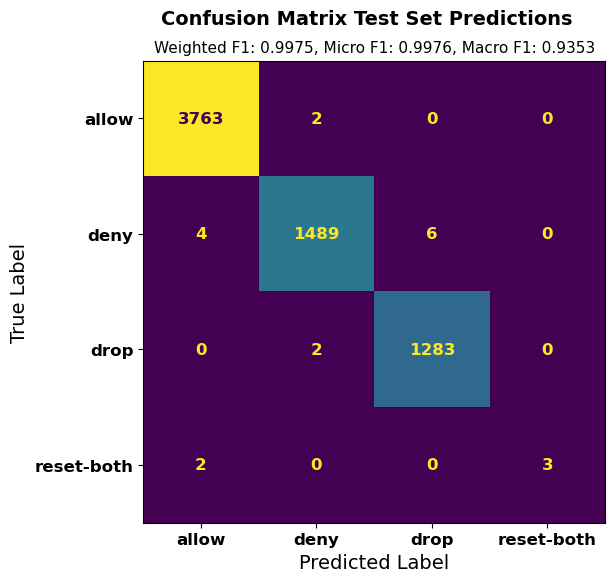

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6), squeeze=True)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_pred, 
                                        ax=ax, 
                                        colorbar=False)

wf1 = f"{test_weighted_f1:.4f}"
micro = f"{test_micro_f1:.4f}"
macro = f"{test_macro_f1:.4f}"
metrics = f"Weighted F1: {wf1}, Micro F1: {micro}, Macro F1: {macro}"

plt.suptitle("Confusion Matrix Test Set Predictions", 
             fontsize=14,               
             y=0.95,
             weight="bold", 
             ha="center", 
             va="center")

ax.set_title(metrics, fontsize=11)
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)

### Training Set Confusion Matrix

In [ ]:
target = "Action"
drop_cols = ["NAT Destination Port"]

X_train = train_df.drop(columns=drop_cols+[target])
y_train = train_df[target].to_numpy()

y_pred_train = 

In [ ]:
train_weighted_f1 = f1_score(y_true=y_train, y_pred=y_pred, average="weighted")
train_micro_f1 = f1_score(y_true=y_test, y_pred=y_pred, average="micro")
train_macro_f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")

print(f"Weighted F1: {test_weighted_f1}")
print(f"Micro F1: {test_micro_f1}")
print(f"Macro F1: {test_macro_f1}")